#**Data analysis Domestic violence**
-----------------------
##This notebook analyzes business crises, emergency situations in a context of domestic violence.

-----------------------
#####**objetive**

Apply concepts of probability distributions to model certain aspects of the crisis. For example, modeling the distribution of financial losses. Luego, use statistical inference techniques to draw conclusions about the crisis.

#####**DataSets**

- Reporte Delito Violencia Intrafamiliar Policía Nacional | Datos Abiertos Colombia
    https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Delito-Violencia-Intrafamiliar-Polic-a-Nac/vuyt-mqpw/about_data

- Tasa de Violencia intrafamiliar en Bogotá D.C.
    https://datosabiertos.bogota.gov.co/dataset/numero-de-casos-de-violencia-intrafamiliar

- 

#####**Importing necessary libraries**

In [109]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#variables
National_police_report_route = 'Files/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional_20241030.csv'
Bogota_police_report_route ='Files/obs_intrafamiliar.xlsx'

In [ ]:
#to_delete : information
ruta_absoluta = os.path.abspath(Bogota_police_report_route)
print(ruta_absoluta)

c:\Users\ALEXANDER\Documents\Especializacion\Tratamiento_y_analitica_datos\Tarea1\Codigo\Analitica_datos\Files\obs_intrafamiliar.xlsx


In [ ]:
#Reading input file CSV
df_police_report= pd.read_csv(National_police_report_route)

print("List of fields and data types:")
print(df_police_report.dtypes)

List of fields and data types:
DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE     object
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object


C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_8772\809148276.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_police_report= pd.read_csv(National_police_report_route)


In [ ]:
# Reading input file Excel
df_bogota_report = pd.read_excel(Bogota_police_report_route)

print("List of fields and data types:")
print(df_bogota_report.dtypes)

List of fields and data types:
ANO                           int64
GRUPOEDAD                    object
SEXO                         object
NOMBRELOCALIDADRESIDENCIA    object
PERTENENCIAETNICA            object
TIPOASEGURAMIENTO            object
ENTIDADADMINISTRADORA        object
LUGOCURRENCIAEMOCIONAL       object
LUGOCURRENCIAFISICA          object
LUGOCURRENCIASEXUAL          object
LUGOCURRENCIAECONOMICA       object
LUGOCURRENCIANEGLIGENCIA     object
LUGOCURRENCIAABANDONO        object
dtype: object


In [114]:
#print of first rows 
#National Dataset
df_police_report['FECHA HECHO'] = pd.to_datetime(df_police_report['FECHA HECHO'], format='%d/%m/%Y')
print(df_police_report.head())

   DEPARTAMENTO          MUNICIPIO CODIGO DANE                 ARMAS MEDIOS  \
0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA / CORTOPUNZANTE   
1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA / CORTOPUNZANTE   
2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA / CORTOPUNZANTE   
3      CASANARE               MANÍ    85139000  ARMA BLANCA / CORTOPUNZANTE   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA / CORTOPUNZANTE   

  FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD  
0  2010-01-01  MASCULINO      ADULTOS         1  
1  2010-01-01   FEMENINO      ADULTOS         1  
2  2010-01-01  MASCULINO      ADULTOS         1  
3  2010-01-01   FEMENINO      ADULTOS         1  
4  2010-01-01   FEMENINO      ADULTOS         1  


In [ ]:
#print of first rows 
#Bogota Dataset
print(df_bogota_report.head())

    ANO        GRUPOEDAD    SEXO NOMBRELOCALIDADRESIDENCIA PERTENENCIAETNICA  \
0  2016    De 1 - 5 años   Mujer                       NaN             Otros   
1  2016    De 1 - 5 años  Hombre                       NaN             Otros   
2  2016   De 6 - 13 años   Mujer                       NaN             Otros   
3  2016  De 27 - 44 años   Mujer                       NaN             Otros   
4  2016  De 27 - 44 años   Mujer                       NaN             Otros   

  TIPOASEGURAMIENTO   ENTIDADADMINISTRADORA LUGOCURRENCIAEMOCIONAL  \
0      Contributivo          Salud Total SA            1. Vivienda   
1      Contributivo          Salud Total SA            1. Vivienda   
2        Subsidiado  Capital Salud EPSS SAS            1. Vivienda   
3        Subsidiado  Capital Salud EPSS SAS            1. Vivienda   
4      Contributivo             Medimas EPS            1. Vivienda   

  LUGOCURRENCIAFISICA LUGOCURRENCIASEXUAL LUGOCURRENCIAECONOMICA  \
0           No aplica         

In [ ]:
# Filter only rows where gender is:  MASCULINO
df_masculino_incidents = df_police_report[df_police_report['GENERO'] == 'MASCULINO']

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_8772\760084845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_masculino, x='ARMAS MEDIOS', palette='viridis')


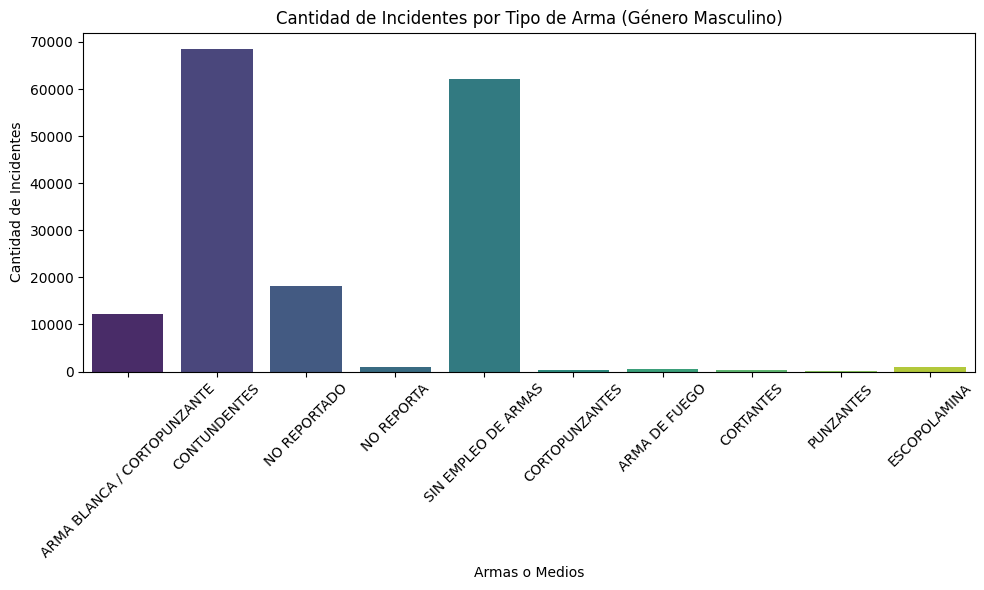

In [ ]:
# Bar graph showing the number of incidents using 'ARMAS MEDIOS'
plt.figure(figsize=(10, 6))  
sns.countplot(data=df_masculino_incidents, x='ARMAS MEDIOS', palette='viridis')

# Graph properties
plt.title('Cantidad de Incidentes por Tipo de Arma (Género Masculino)')
plt.xlabel('Armas o Medios')
plt.ylabel('Cantidad de Incidentes')
plt.xticks(rotation=45) 

# Show
plt.tight_layout()
plt.show()

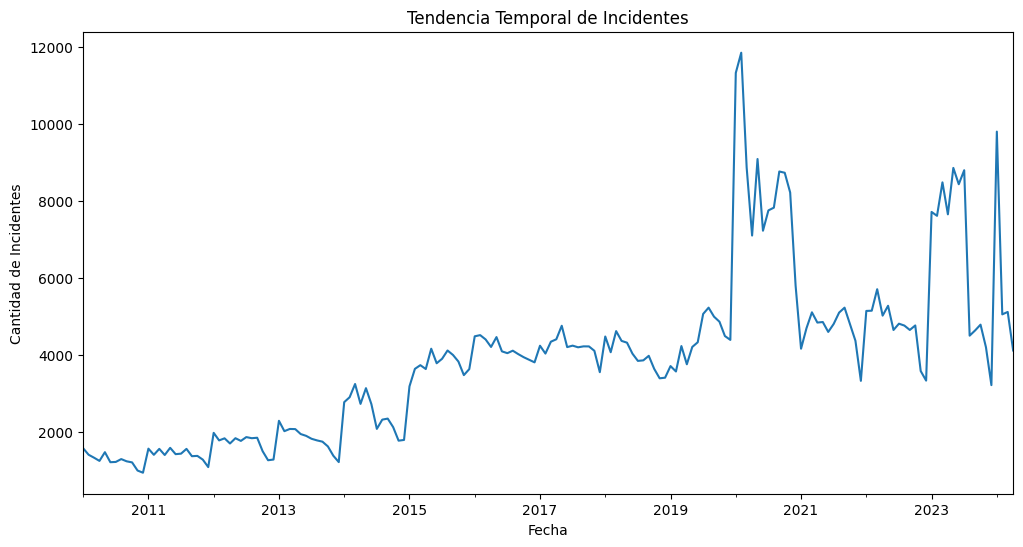

In [ ]:
#Incidents temporay distributiono using:  FECHA HECHO.

df_police_report['FECHA HECHO'] = pd.to_datetime(df_police_report['FECHA HECHO'])
df_tiempo = df_police_report.groupby(df_police_report['FECHA HECHO'].dt.to_period('M')).size()
df_tiempo.plot(kind='line', figsize=(12, 6))
plt.title('Tendencia Temporal de Incidentes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Incidentes')
plt.show()